In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
df = pd.read_csv('titanic.csv')
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [3]:
class NaiveBayesClassifier:
    def __init__(self):
        self.prior = {}
        self.conditional = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for c in self.classes:
            self.prior[c] = np.mean(y == c)

        for feature in X.columns:
            self.conditional[feature] = {}
            for c in self.classes:
                feature_values = X[feature][y == c]
                self.conditional[feature][c] = {'mean': np.mean(feature_values), 'std': np.std(feature_values)}

    def predict(self, X):
        y_pred = []
        for _, sample in X.iterrows():
            probabilities = {}
            for c in self.classes:
                probabilities[c] = self.prior[c]
                for feature in X.columns:
                    mean = self.conditional[feature][c]['mean']
                    std = self.conditional[feature][c]['std']
                    x = sample[feature]
                    probabilities[c] *= self._gaussian_pdf(x, mean, std)
            y_pred.append(max(probabilities, key=probabilities.get))
        return y_pred

    def _gaussian_pdf(self, x, mean, std):
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

In [4]:
train, test = train_test_split(df, test_size=0.2)

X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('Survived', axis=1)
y_test = test['Survived']

classifier = NaiveBayesClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[96 15]
 [39 29]]
Accuracy: 0.6983240223463687


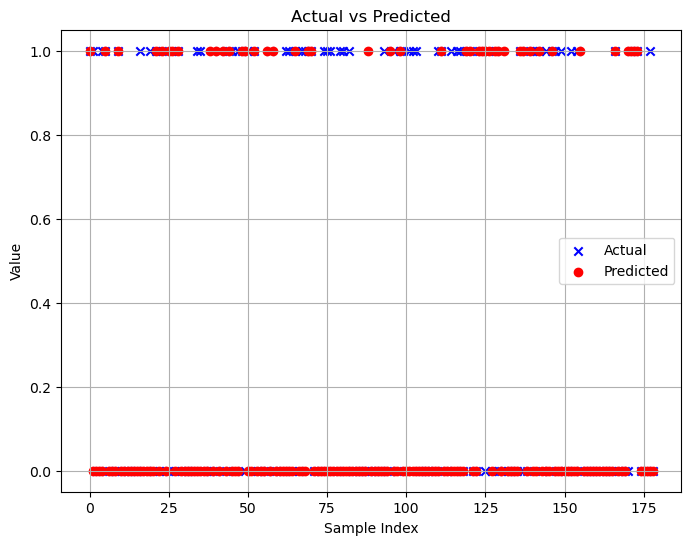

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, marker='x', color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, marker='o', color='red', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()
